# Вычисление весового спектра линейного подпространства

In [1]:
import numpy as np

1. Нужно ввести значение N и по ней получить вектора. Например N = 3, тогда 2^3 = 8, нужно получить 8 комбинаций векторов. Создать матрицу (a).

In [2]:
n = 4 #Длина вектора из 0 и 1
A = [] #Будущая матрица
for i in range(2 ** n):
    A.append('{0:b}'.format(i).rjust(n, '0')) #Применяем форматирование строк для каждой комбинации вектора и получаем матрицу 2^n, n
    A = [list(map(int, x)) for x in A] #Переводим занчения в int - векторы

2. Введем операцию сложения по модулю 2 векторов (операция хог) (b) и получим матрицу состоящию из сложения векторов (c) по операции ИЛИ.

**P.S.** В задании сказано, что нужно создать новую матрицу "порождающию", которая будет результатом ИЛИ каждой строки, т.е. Если у нас матрица из 4 строк, тогда "порождающая" матрица будет состоять из 6 строк, по условию 0<=K<=N, где колличество строк 2^k - это есть результат ИЛИ строк с индексами 1 + 2, 1 + 3, 1 + 4, 2 + 3, 2 + 4, 3 + 4, всего 6 операций.


**P.S.S.** Матрица[Номер вектора],[Номер строки] - индекс с 0.

**Дополнительно требуется оценить ресуры затрачиваемые кодом, в качестве n  = 4. Для этого установим Memory Profiler.**

In [14]:
!pip install -U memory_profiler

  Created wheel for memory-profiler: filename=memory_profiler-0.57.0-cp36-none-any.whl size=28992 sha256=f751cd6d34eee7a640cc6fe8ae564fd94f59803983602294b8fc39dc0f5df00e
  Stored in directory: /root/.cache/pip/wheels/74/20/b5/20964ef97be73d2c3a695c9cad7bccd96d1e3e737a8163861f
Successfully built memory-profiler


In [3]:
%load_ext memory_profiler

In [4]:
k = [] #Новая матрица.
for i in range(len(A)):
  for z in range(1, len(A) - i):
    for j in range(n):
      k.append(A[i][j] ^ A[i+z][j])
      #print(A[i][j] ^ A[i+z][j])
k = np.reshape(k, (int(len(k)/n), n)) #Создаем из вектора матрицу, с длинной n, и колличество строк равен колличество значений на n (колличество столбцов), т.к цикл по j создает элементы последовательно.
#Необходимо дополнительно оценить ресурсы, измерим в строчках кода использование памяти и времени
%memit
%time

peak memory: 151.37 MiB, increment: 0.06 MiB
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


Проверяем. Проверка производилась на матрице с длиной N = 2, чтобы можно было сравнить с ручными вычислениями. 

P.S. Если длина матрицы больше 2, тогда нужно изменить reshape. В данном случае, в этом нет необходимости.

In [18]:
print("Новая матрица")
print(k)
print("Предыдущая матрица")
print(np.reshape(A, (n**2, n)))
#del A

Новая матрица
[[0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]]
Предыдущая матрица
[[0 0]
 [0 1]
 [1 0]
 [1 1]]


4. Необходимо посчитать вес каждой строки матрицы. Наша матрица, как сказано ранее состоит из векторов множества, а значит мы считаем вес вектора.(d)

In [5]:
weight = []
for i in range(len(k)):
  weight.append(sum(k[i]))
#print(weight)
#Необходимо дополнительно оценить ресурсы, измерим в строчках кода использование памяти и времени
%memit
%time

peak memory: 151.56 MiB, increment: 0.02 MiB
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


5. Требуется для задания из числа множеств векторов и числа N построить гистограмму (спектр) колличества различных векторов по их весу.

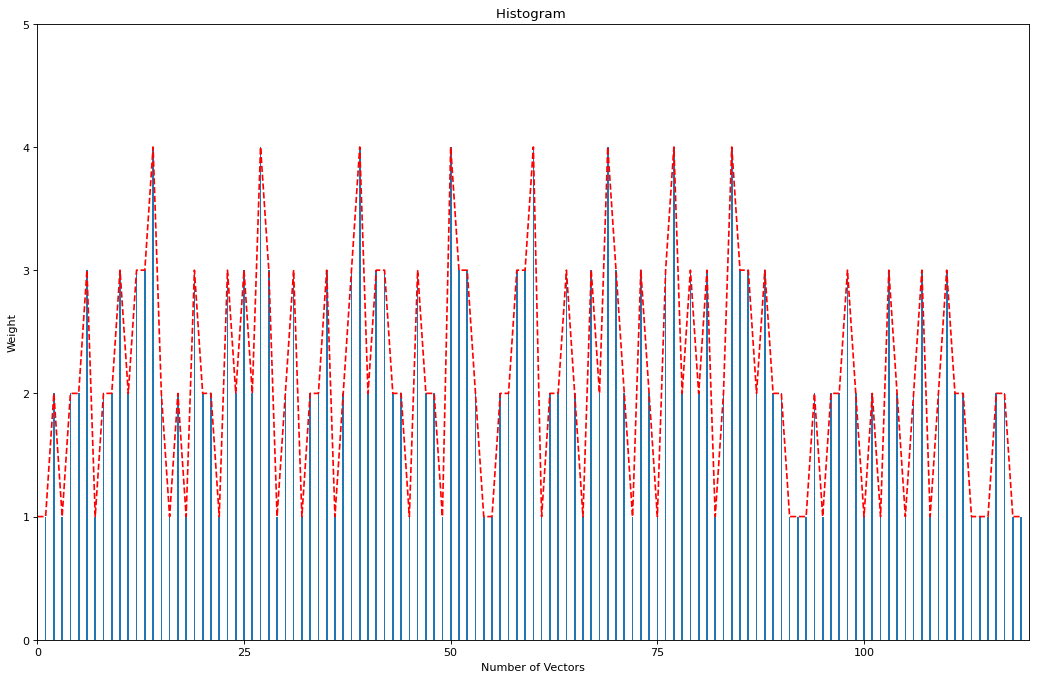

peak memory: 164.48 MiB, increment: 0.03 MiB
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


In [6]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
objects = range(len(k))
y_pos = np.arange(len(objects))

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.bar(y_pos, weight, align='center', width = 0.2) #Вес линий, синим цветом на графике
plt.yticks(y_pos)
plt.xticks(np.arange(min(objects), max(objects), 25.0))

plt.title('Histogram ')
plt.gca().set(xlim=(0, len(k)), ylim=(0, max(weight)+1),
              xlabel='Number of Vectors', ylabel='Weight')

plt.plot(objects, weight, 'r--') #Красная линия

plt.show()
#Необходимо дополнительно оценить ресурсы, измерим в строчках кода использование памяти и времени
%memit
%time

Формат выходных данных: Текстовый файл строк с парой значений вес/количество разделённых символом табуляции, по одной паре на строку, сортированный по числовому значению веса.

In [378]:
#Необходимо вывести данные в текстовой файл с симоволом табуляции "/", чтобы выглядило как 
import pandas as pd

def save_text(k, weight):
  symbol = np.zeros((len(weight), 1), dtype = np.str)
  for i in range(len(weight)):
    symbol[i] = '/'
  cell = pd.concat([pd.DataFrame(k), pd.DataFrame(symbol), pd.DataFrame(weight)], axis=1, ignore_index=True)
  cell = cell.sort_values(by=cell.columns[-1],ascending=False, ignore_index=True)
  return(cell)

In [380]:
with open("file.txt", "w") as output:
    output.write(str(save_text(k, weight)))

Проверяем содержимое текстового файла

In [411]:
f = open("/content/file.txt", "r")

In [408]:
print(*f)


 0   1  1  1  /  3
 1   1  1  1  /  3
 2   1  1  1  /  3
 3   1  1  1  /  3
 4   1  1  0  /  2
 5   1  0  1  /  2
 6   1  0  1  /  2
 7   1  1  0  /  2
 8   1  0  1  /  2
 9   0  1  1  /  2
 10  0  1  1  /  2
 11  0  1  1  /  2
 12  1  1  0  /  2
 13  1  0  1  /  2
 14  0  1  1  /  2
 15  1  1  0  /  2
 16  0  1  0  /  1
 17  0  0  1  /  1
 18  1  0  0  /  1
 19  0  1  0  /  1
 20  0  0  1  /  1
 21  1  0  0  /  1
 22  0  1  0  /  1
 23  0  0  1  /  1
 24  1  0  0  /  1
 25  0  1  0  /  1
 26  1  0  0  /  1
 27  0  0  1  /  1


# Дополнительно

Либо сохранение в csv формат

In [416]:
save_text(k, weight).to_csv("out.csv",index=False)

P.S. На случай, если у нас входные данные будут в текстовом файле, они просто сохраняются в переменную A и подбирается n по колличеству столбцов. 

Пример:

In [427]:
A = pd.read_csv("/content/out.csv").drop([test.columns[-1], test.columns[-2]], axis=1)

In [440]:
print("Входные данные размером не более 2^n векторов")
print(A.iloc[:2**n]) #В качестве А
print("Колличество столбцов, либо n")
print(len(A.columns)) #В качестве n
print("Колличество векторов, всего возможно 2^n")
print(len(A.iloc[:2**n])) #В качестве 2^n

Входные данные размером не более 2^n векторов
   0  1  2
0  1  1  1
1  1  1  1
2  1  1  1
3  1  1  1
4  1  1  0
5  1  0  1
6  1  0  1
7  1  1  0
Колличество столбцов, либо n
3
Колличество векторов, всего возможно 2^n
8
